# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Elnaz | Gholizadeh | ElnazGholizadeh, Nov 25 2024 | Hours | 25 |
| Member 2: | Gopika | Menon | Gopika Menon, Nov 27 2024 | 12 | 25 |
| Member 3: | First Name | Last Name | Signature | Hours | Contribution |
| Member 4: | First Name | Last Name | Signature | Hours | Contribution |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# some library imports
import pandas as pd

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [35]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
cv_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/engg680_2024_fall/Lab_Assignment4/UrbanNav-HK_Whampoa-20210521_sensors.csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/engg680_2024_fall/Lab_Assignment4/UrbanNav-HK_TST-20210517_sensors.csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/engg680_2024_fall/Lab_Assignment4/2020-03-14-16-45-35.csv')

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).



In [36]:
# TODO: Display first two rows of cv_set
print(cv_set.head())

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   
2 -0.008014  0.037066  9.792780 -0.001129  0.001207  0.005840  9.805465   
3 -0.097655  0.286081  9.781135 -0.000960  0.002518  0.076946  9.792874   
4 -0.239673  0.288418  9.779307 -0.001625  0.005648  0.157407  9.794137   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   
2  0.024407  1.128046e-06  4.231253e-07  ...  0.000003  0.003009  0.002097   
3  0.080408  7.988949e-07  6.873045e-08  ...  0.000052  0.001546  0.001457   
4  0.158930  8.240663e-07  1.143863e-07  ...  0.000233  0.001387  0.001681   

     az_max    gx_max    gy_max    gz_max     a_max     g_max  motion_state  
0 

In [37]:
# TODO: Load the info method of cv_set
print(cv_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [38]:
# TODO: Display the number of rows and columns  of all three datasets
print(list(cv_set.columns))
print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")

['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum', 'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var', 'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min', 'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max', 'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state']
'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [39]:
# TODO: Display all columns in cv_set
print(list(cv_set.columns))

['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum', 'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var', 'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min', 'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max', 'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state']


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [40]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']

From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [41]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop('motion_state', axis=1)
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [43]:
# TODO - Perform test/train split
# (1 mark)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42,stratify=y)

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [44]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([('scaler',StandardScaler()),('classifier',SVC())])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [45]:
# TODO - Setup grid set
# (4 marks)

param_grid = {'scaler': [StandardScaler(), RobustScaler(), None],'classifier__C': [0.01, 0.1, 1, 10, 100],'classifier__gamma': [0.001, 0.01, 0.1, 1],'classifier__kernel': ['rbf']}

In [46]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy', return_train_score=True)
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [47]:
# TODO: Print the results from the grid search
# (2 marks)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test,y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.98
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

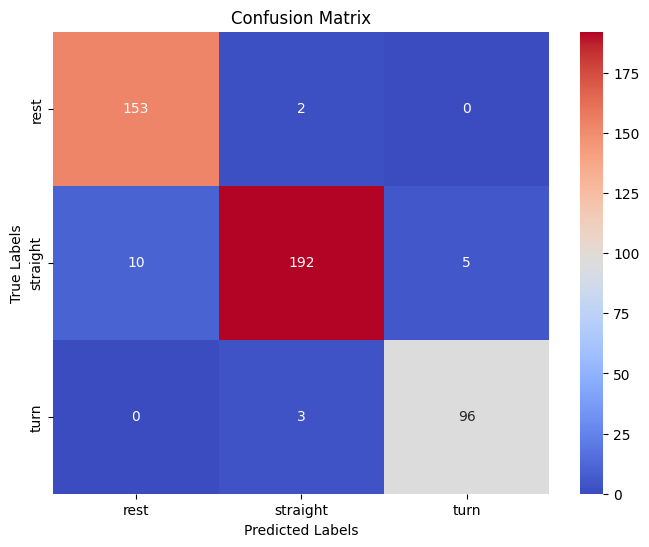

              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [48]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# Predicting the labels for the test set
y_pred = grid.predict(X_test)

# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Displaying using a heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(cm,annot=True,fmt="d",cmap="coolwarm",xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Printing the classification report
print(classification_report(y_test, y_pred))

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1. Good fit as the accuracy is 96%, the performance is balanced with precision, recall, and F1-scores all over 93%.  The model is effective at handling all three classes without biasing any. The misclassifications are also low with only 2, 5 &10, and 3 for rest, straight and turn respectively.

2.  The intervals are suitable as they are within typical SVM ranges. It seems like C=100 balanced regularization and complexity and gamma=0.01 allowed the grid search to find a generalizable decision boundary. The high trainign, validation, and scores confirm their efficacy.

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [49]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1.drop('motion_state', axis=1)
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [50]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop('motion_state',axis=1)
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [51]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)

print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.92
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

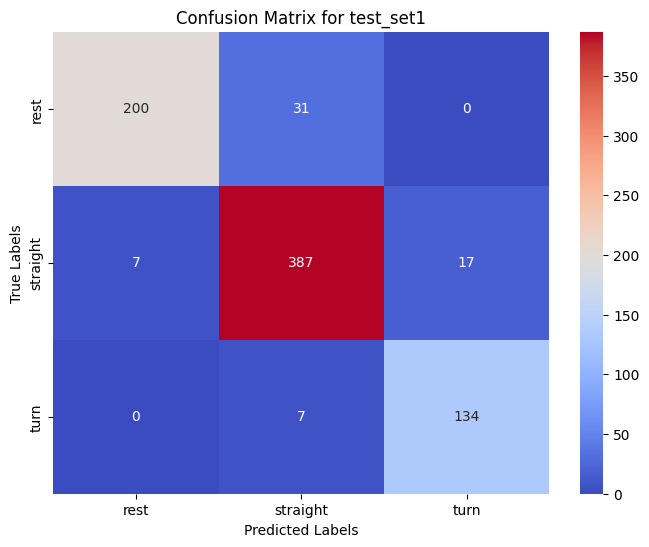

              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



In [52]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# Predicting the labels for the test set
y1_pred = grid.predict(X1)

# Creating the confusion matrix
cm1 = confusion_matrix(y1, y1_pred)

# Displaying using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="coolwarm", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set1")
plt.show()

# Printing the classification report
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

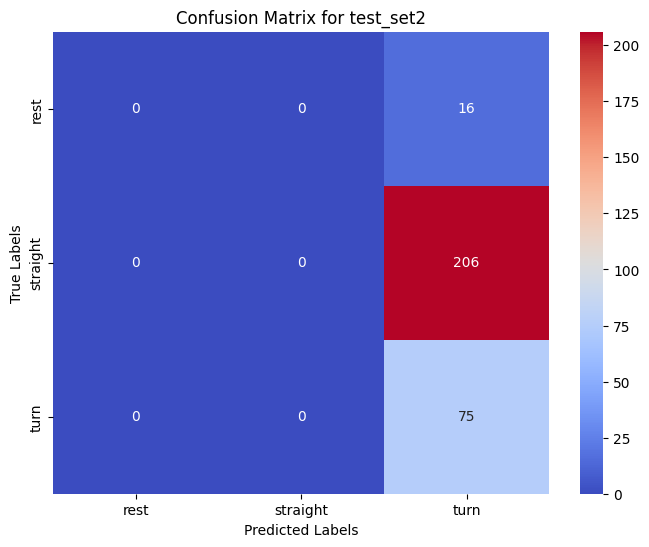

              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [53]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

# Predicting the labels for the test set
y2_pred = grid.predict(X2)

# Creating the confusion matrix
cm2 = confusion_matrix(y2, y2_pred)

# Displaying using a heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt="d", cmap="coolwarm", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set2")
plt.show()

# Printing the classification report
print(classification_report(y2, y2_pred))     #Can somebody check this please

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1. The model seems to perform well on the dataset it was trained and validated on;however, when tested on independent datasets (X1, y1) and (X2, y2), a significant drop in performance is seen. The discrepancy indicates poor generalization of the model to new, unseen datasets, despite its strong performance on the original test set.
1.The potential causes could be dataset shift or domain shift, where the statistical properties of the independent datasets differ from the training/validation data or testing data.
#somebody check this too

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [54]:
# TODO - Load selected features from cv_set to X
# (1 marks)
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[selected_features]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [55]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [102]:
# TODO - Perform model training and tuning using `GridSearchCV`
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

pipe = Pipeline([('scaler', StandardScaler()), ('classifier', SVC())])

param_grid = {'scaler': [StandardScaler(), RobustScaler(), None], 'classifier__C': [0.01, 0.1, 1, 10, 100], 'classifier__gamma': [0.001, 0.01, 0.1, 1], 'classifier__kernel': ['rbf'] }

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [103]:
# TODO: Print the results from the grid search

print(f"Best parameters found: {grid.best_params_}\n")
best_train_score = grid.cv_results_['mean_train_score'][grid.best_index_]
print(f"Best cross-validation train score: {best_train_score:.2f}")
best_test_score = grid.best_score_
print(f"Best cross-validation test score: {best_test_score:.2f}")
test_accuracy = grid.score(X_test, y_test)
print(f"Test set accuracy: {test_accuracy:.2f}")

Best parameters found: {'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.84
Best cross-validation test score: 0.82
Test set accuracy: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split.

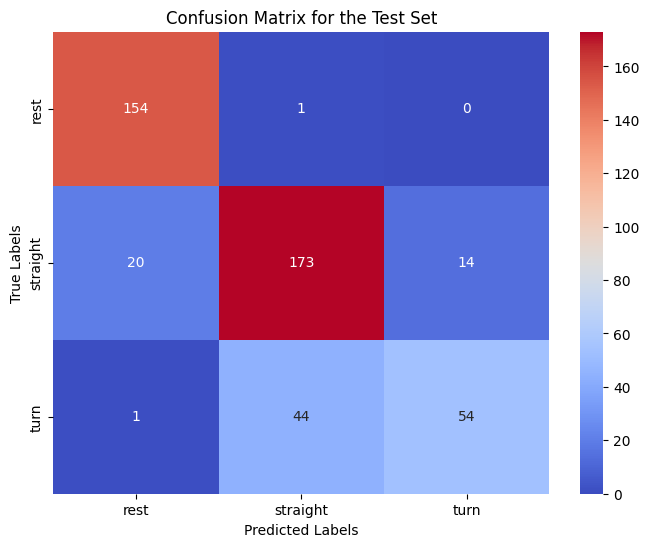

              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



In [104]:
# TODO - Display confusion matrix and print classification reports
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = grid.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for the Test Set")
plt.show()

print(classification_report(y_test, y_pred))

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1. The model from Section 1.2.3 has a higher test accuracy (0.96 vs. 0.83) and better cross-validation results (0.95 vs. 0.82), meaning its a better fit. This is probabably because only selected features were captured in Section 2.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [105]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1[selected_features]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [106]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[selected_features]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [107]:
# TODO - Print test score accuracies for test_set1 and test_set2
from sklearn.metrics import accuracy_score

y1_pred = grid.predict(X1)
test_set1_accuracy = accuracy_score(y1, y1_pred)
print("test_set1 score: {:.2f}".format(test_set1_accuracy))

y2_pred = grid.predict(X2)
test_set2_accuracy = accuracy_score(y2, y2_pred)
print("test_set2 score: {:.2f}".format(test_set2_accuracy))

test_set1 score: 0.83
test_set2 score: 0.84


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

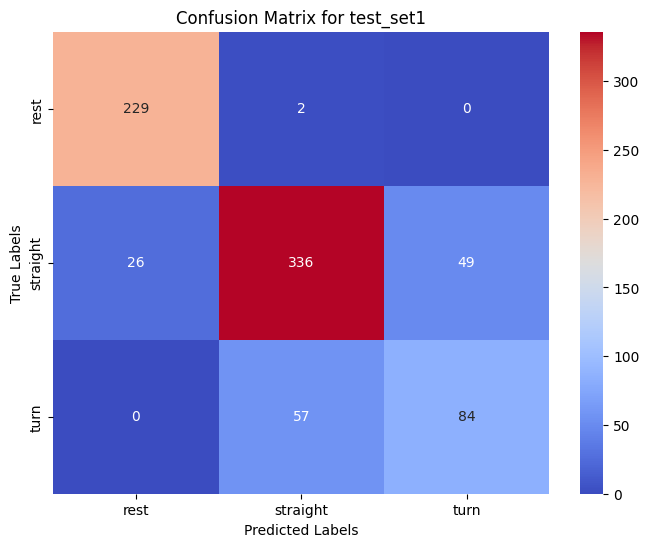

              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



In [108]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
from sklearn.metrics import confusion_matrix, classification_report

cm1 = confusion_matrix(y1, y1_pred)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="coolwarm", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set1")
plt.show()

print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

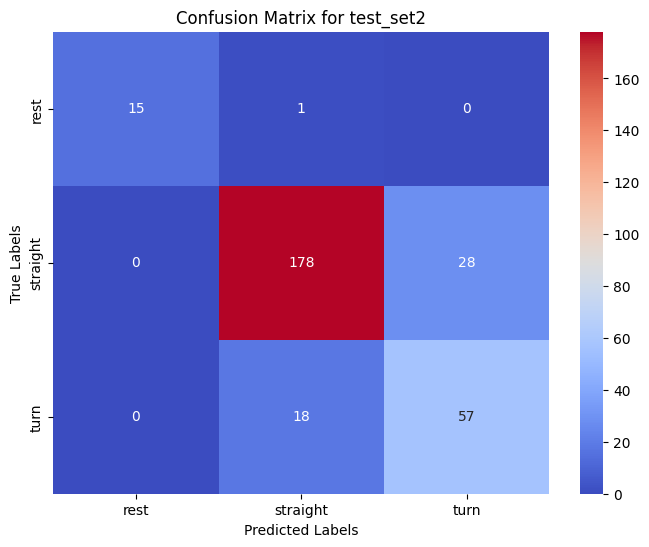

              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



In [109]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
from sklearn.metrics import confusion_matrix, classification_report

cm2 = confusion_matrix(y2, y2_pred)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt="d", cmap="coolwarm", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set2")
plt.show()

print(classification_report(y2, y2_pred))

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1. The training/validation set accuracy was 83% on test split and 82% on the cross validation and on test set 1 the accuracy was 83% and 84% on test set 2 meaning the model is well-fitted to the training data.
2. For section 1, the training/validation model accuracy was 96% and the accuracy for test set 1 was 92% and 25% on test set 2. For section 2, the training/validation model accuracy was 83%, and the accuracy for test set 1 was 83% and 84% on test set 2. Based on this, the model from Section 2 fits better and portrays a more consistent performance across the training/validation and independent test sets in comparison to Section 1.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1.   

In [64]:
# TODO - Load group selected features from cv_set to X
# X =
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [65]:
# TODO - Load motion_state column (target vector) into y
# y =

___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [66]:
# TODO - Perform model training and tuning using `GridSearchCV`

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [67]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [68]:
# TODO - Display confusion matrix and print classification report

___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [69]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [70]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [71]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [72]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [73]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1.
1.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [74]:
# TODO - Load all features from cv_set to X
# X =
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [75]:
# TODO - Load motion_state column (target vector) into y
# y =

___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [76]:
# TODO - Perform model training and tuning using `GridSearchCV`
# X_train, X_test, y_train, y_test =

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [77]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 marks)
# pipe =

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [78]:
# TODO - Define the parameter grid for your model
# (3 marks)
# param_grid =

In [79]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [80]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [81]:
# TODO - Display confusion matrix and print classification report

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [82]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [83]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 4.2.2 - Visualize Results

In [84]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

In [85]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [86]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1.

In [87]:
# TODO - Load group selected features from cv_set to X
# X =
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [88]:
# TODO - Load motion_state column (target vector) into y
# y =

___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [89]:
# TODO - Perform train/test split

In [90]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 mark)
# pipe =

In [91]:
# TODO - Define the parameter grid for your model
# (3 marks)
# param_grid =

In [92]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [93]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [94]:
# TODO - Display confusion matrix and print classification report

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [95]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [96]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [97]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [98]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [99]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
1.


____